In [1]:
import pandas as pd
import re
%matplotlib inline

In [2]:
df = pd.read_csv('data/raw_data.csv')
df.head()

,SuR,Rgrp,Org,Recommendation,RS,Rgrp.1,Org.1,Response,Action,Issue,Session,filename
0,Afghanistan,Asia,OIC,Enact legislation and take effective measures ...,Austria,WEOG,EU,Supported,5,"Rights of the Child,Women's rights",5.0,data/01-06-UPR-INFO-DATABASE-EXPORT-2018_07_25...
1,Afghanistan,Asia,OIC,Establish a mechanism in order to systematical...,Austria,WEOG,EU,Supported,5,"Human rights education and training,Justice",5.0,data/01-06-UPR-INFO-DATABASE-EXPORT-2018_07_25...
2,Afghanistan,Asia,OIC,Investigate thoroughly all acts of violence ag...,Austria,WEOG,EU,Supported,5,"Human rights defenders,Women's rights",5.0,data/01-06-UPR-INFO-DATABASE-EXPORT-2018_07_25...
3,Afghanistan,Asia,OIC,Submit its delayed reports to the Committee ag...,Czechia,EEG,EU,Supported,5,"Torture and other CID treatment,Treaty bodies",5.0,data/01-06-UPR-INFO-DATABASE-EXPORT-2018_07_25...
4,Afghanistan,Asia,OIC,Take extensive and timely steps to ensure the ...,Denmark,WEOG,EU,Supported,5,Freedom of the press,5.0,data/01-06-UPR-INFO-DATABASE-EXPORT-2018_07_25...


In [3]:
df.shape

(61014, 12)

In [4]:
df.dtypes

SuR                object
Rgrp               object
Org                object
Recommendation     object
RS                 object
Rgrp.1             object
Org.1              object
Response           object
Action              int64
Issue              object
Session           float64
filename           object
dtype: object

In [5]:
df.drop(columns='filename', inplace=True)

'Asylum-seekers - refugees',
'Business and Human Rights',
'Civil society',
'Corruption',
'Counter-terrorism',
'CP rights - general',
'Death penalty',
'Detention',
'Development',
'Disabilities',
'Elections',
'Enforced disappearances',
'Environment',
'ESC rights - general',
'Extrajudicial executions',
'Freedom of association and peaceful assembly',
'Freedom of movement',
'Freedom of opinion and expression',
'Freedom of religion and belief',
'Freedom of the press',
'General',
'HIV - Aids',
'Human rights defenders',
'Human rights education and training',
'Human rights violations by state agents',
'Impunity',
'Indigenous peoples',
'Internally displaced persons',
'International humanitarian law',
'International instruments',
'Justice',
'Labour',
'Migrants',
'Minorities',
'NHRI',
'Other',
'Privacy',
'Poverty',
'Public security',
'Racial discrimination',
'Right to education',
'Right to food',
'Right to health',
'Right to housing',
'Right to land',
'Right to water and sanitation',
'Rights of the Child',
'Sexual Orientation and Gender Identity',
'Special procedures',
'Statelessness',
'Technical assistance and cooperation',
'Torture and other CID treatment',
'Trafficking',
'Treaty bodies',
'UPR process',
'Women's rights'

### Thanks Sublime Text for making it a breeze to format these!

In [6]:
issues_list = ['Asylum-seekers - refugees', 'Business and Human Rights', 'Civil society', 'Corruption', 'Counter-terrorism', 'CP rights - general', 'Death penalty', 'Detention', 'Development', 'Disabilities', 'Elections', 'Enforced disappearances', 'Environment', 'ESC rights - general', 'Extrajudicial executions', 'Freedom of association and peaceful assembly', 'Freedom of movement', 'Freedom of opinion and expression', 'Freedom of religion and belief', 'Freedom of the press', 'General', 'HIV - Aids', 'Human rights defenders', 'Human rights education and training', 'Human rights violations by state agents', 'Impunity', 'Indigenous peoples', 'Internally displaced persons', 'International humanitarian law', 'International instruments', 'Justice', 'Labour', 'Migrants', 'Minorities', 'NHRI', 'Other', 'Privacy', 'Poverty', 'Public security', 'Racial discrimination', 'Right to education', 'Right to food', 'Right to health', 'Right to housing', 'Right to land', 'Right to water and sanitation', 'Rights of the Child', 'Sexual Orientation and Gender Identity', 'Special procedures', 'Statelessness', 'Technical assistance and cooperation', 'Torture and other CID treatment', 'Trafficking', 'Treaty bodies', 'UPR process', "Womens rights"]
len(issues_list)

56

In [7]:
for issue in issues_list:
    df[issue] = df.Issue.str.extract(r"("+issue+")")

In [8]:
for issue in issues_list:
    df[issue].fillna('0', inplace=True)

In [9]:
for issue in issues_list:
    df[issue] = df[issue].str.replace(issue, '1')

In [10]:
for issue in issues_list:
    df[issue] = df[issue].astype('int64')

In [11]:
df.to_csv('data_cleaned.csv', index=False)

In [12]:
df = pd.read_csv('data_cleaned.csv')

In [13]:
df.head()

,SuR,Rgrp,Org,Recommendation,RS,Rgrp.1,Org.1,Response,Action,Issue,...,Rights of the Child,Sexual Orientation and Gender Identity,Special procedures,Statelessness,Technical assistance and cooperation,Torture and other CID treatment,Trafficking,Treaty bodies,UPR process,Womens rights
0,Afghanistan,Asia,OIC,Enact legislation and take effective measures ...,Austria,WEOG,EU,Supported,5,"Rights of the Child,Women's rights",...,1,0,0,0,0,0,0,0,0,0
1,Afghanistan,Asia,OIC,Establish a mechanism in order to systematical...,Austria,WEOG,EU,Supported,5,"Human rights education and training,Justice",...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,Asia,OIC,Investigate thoroughly all acts of violence ag...,Austria,WEOG,EU,Supported,5,"Human rights defenders,Women's rights",...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,Asia,OIC,Submit its delayed reports to the Committee ag...,Czechia,EEG,EU,Supported,5,"Torture and other CID treatment,Treaty bodies",...,0,0,0,0,0,1,0,1,0,0
4,Afghanistan,Asia,OIC,Take extensive and timely steps to ensure the ...,Denmark,WEOG,EU,Supported,5,Freedom of the press,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.SuR = df.SuR.str.replace('Bosnia and Herzegovina\n', 'Bosnia and Herzegovina')
df.SuR = df.SuR.str.replace('Bosnia and Herzegovina\r\n', 'Bosnia and Herzegovina')
df.SuR = df.SuR.str.replace('Trinidad and Tobago\n', 'Trinidad and Tobago')
df.SuR = df.SuR.str.replace('Trinidad and Tobago\r\n', 'Trinidad and Tobago')

df.RS = df.RS.str.replace('Bosnia and Herzegovina\n', 'Bosnia and Herzegovina')
df.RS = df.RS.str.replace('Bosnia and Herzegovina\r\n', 'Bosnia and Herzegovina')
df.RS = df.RS.str.replace('Trinidad and Tobago\n', 'Trinidad and Tobago')
df.RS = df.RS.str.replace('Trinidad and Tobago\r\n', 'Trinidad and Tobago')


In [15]:
df.groupby('Session').SuR.value_counts() #this shows how many recommendations states have received.
#Grouped by the 27 sessions available.

Session  SuR                        
1.0      Netherlands                     52
         Argentina                       41
         Czechia                         37
         Algeria                         36
         United Kingdom                  35
         Poland                          33
         India                           30
         South Africa                    29
         Tunisia                         28
         Philippines                     24
         Finland                         17
         Morocco                         16
         Brazil                          15
         Indonesia                       13
         Bahrain                         12
         Ecuador                         12
2.0      Pakistan                       101
         Sri Lanka                       95
         Guatemala                       62
         Japan                           62
         Ghana                           56
         Romania                       

In [16]:
df.SuR.value_counts()

United States       668
Cuba                534
Iran                511
Sudan               503
Egypt               492
Myanmar             489
Thailand            474
Algeria             465
India               463
Kuwait              457
Indonesia           457
Turkey              455
Philippines         453
Australia           452
South Africa        449
Zimbabwe            443
Brazil              443
Ireland             442
Belarus             441
Tunisia             441
DPR Korea           436
Morocco             428
Viet Nam            428
Venezuela           427
Israel              424
China               422
Singapore           421
Oman                421
Uganda              421
Belgium             421
                   ... 
Ghana               206
Kiribati            205
Vanuatu             204
France              202
Comoros             202
Guatemala           200
Czechia             198
Dominica            194
Mali                194
Ukraine             191
Bahamas         

In [17]:
df.RS.value_counts()

France                         1821
Spain                          1708
Canada                         1586
Norway                         1335
Mexico                         1319
Slovenia                       1238
Uruguay                        1122
Brazil                         1108
United States                  1071
United Kingdom                 1070
Algeria                        1050
Germany                        1048
Chile                          1005
Australia                      1004
Czechia                         982
Argentina                       973
Italy                           970
Austria                         958
Portugal                        942
Netherlands                     935
Egypt                           919
Switzerland                     905
Slovakia                        817
Sweden                          809
Malaysia                        740
Belgium                         730
Turkey                          703
Philippines                 

In [19]:
df[df.RS == '&#40;Unknown&#41;']

,SuR,Rgrp,Org,Recommendation,RS,Rgrp.1,Org.1,Response,Action,Issue,...,Rights of the Child,Sexual Orientation and Gender Identity,Special procedures,Statelessness,Technical assistance and cooperation,Torture and other CID treatment,Trafficking,Treaty bodies,UPR process,Womens rights
4301,Indonesia,Asia,"ASEAN, OIC",Indonesia is commended for its efforts in the ...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,2,Human rights education and training,...,0,0,0,0,0,0,0,0,0,0
4302,Indonesia,Asia,"ASEAN, OIC",Indonesia is encouraged to consider engaging i...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,3,Other,...,0,0,0,0,0,0,0,0,0,0
4303,Indonesia,Asia,"ASEAN, OIC",Indonesia is encouraged to identify its capaci...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,1,"Civil society,National Human Rights Institutio...",...,0,0,0,0,1,0,0,0,1,0
4304,Indonesia,Asia,"ASEAN, OIC","Indonesia, in line with its National Plan of A...",&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,5,International instruments,...,0,0,0,0,0,0,0,0,0,0
4305,Indonesia,Asia,"ASEAN, OIC",It was recommended that additional capacity-bu...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,4,"Rights of the Child,Women's rights",...,1,0,0,0,0,0,0,0,0,0
4309,Indonesia,Asia,"ASEAN, OIC",Indonesia is commended for enabling a vibrant ...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,4,Other,...,0,0,0,0,0,0,0,0,0,0
4310,Indonesia,Asia,"ASEAN, OIC",Welcomes Indonesia's reaffirmation of its comm...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,2,Impunity,...,0,0,0,0,0,0,0,0,0,0
4311,Indonesia,Asia,"ASEAN, OIC",While acknowledging the efforts made by the Go...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,2,General,...,0,0,0,0,0,0,0,0,0,0
4312,Indonesia,Asia,"ASEAN, OIC",The inclusion of the crime of torture in the n...,&#40;Unknown&#41;,&#40;Unknown&#41;,&#40;Unknown&#41;,Supported,4,Torture and other CID treatment,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df.Response.value_counts()

Supported    44606
Noted        16408
Name: Response, dtype: int64

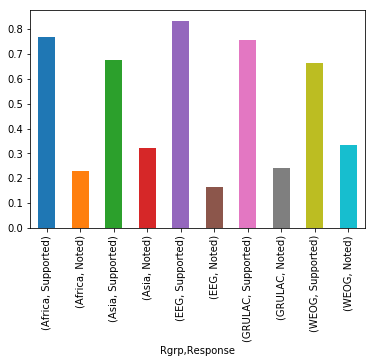

In [21]:
df.groupby('Rgrp').Response.value_counts(normalize=True).plot(kind='bar')

In [22]:
df.to_csv('data_cleaned.csv', index=False)